<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/Data_analytics/blob/main/penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
penguins_df = pd.read_csv('penguins.csv')

# Investigate the dataset
print(penguins_df.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE


In [3]:
print(penguins_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None


In [4]:
# Pre-process the dataset
# Drop rows with missing values
penguins_df.dropna(inplace=True)

In [5]:
# Convert 'sex' to numeric if needed (e.g., using one-hot encoding)
penguins_df['sex'] = penguins_df['sex'].map({'MALE': 0, 'FEMALE': 1})
print(penguins_df.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0              39.1             18.7              181.0       3750.0  0.0
1              39.5             17.4              186.0       3800.0  1.0
2              40.3             18.0              195.0       3250.0  1.0
4              36.7             19.3              193.0       3450.0  1.0
5              39.3             20.6              190.0       3650.0  0.0


In [6]:
# Define features for clustering
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins_df[features]

In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

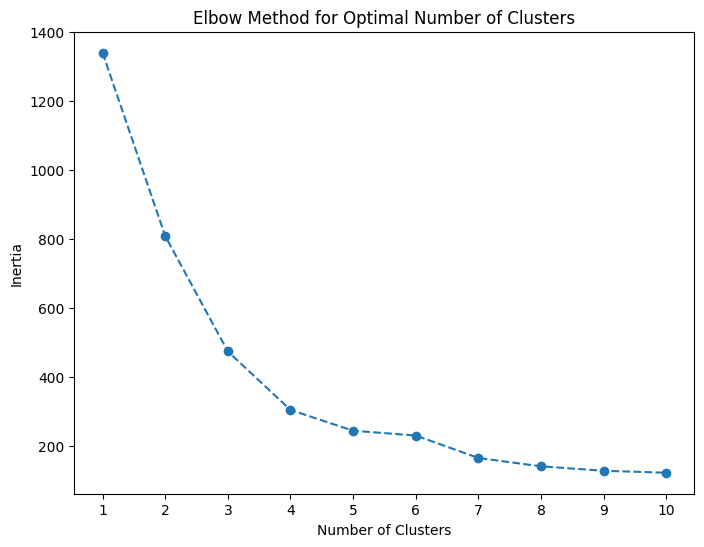

In [8]:
# Range of cluster numbers to try
cluster_range = range(1, 11)
inertia_values = []

# Perform KMeans for each number of clusters and store the inertia (within-cluster sum of squares)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.show()

In [9]:
# Determine the number of clusters
# Let's try with 4 clusters initially
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [10]:
# Add the cluster labels to the original DataFrame
penguins_df['cluster'] = clusters
print(penguins_df.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  \
0              39.1             18.7              181.0       3750.0  0.0   
1              39.5             17.4              186.0       3800.0  1.0   
2              40.3             18.0              195.0       3250.0  1.0   
4              36.7             19.3              193.0       3450.0  1.0   
5              39.3             20.6              190.0       3650.0  0.0   

   cluster  
0        0  
1        0  
2        0  
4        0  
5        0  


In [11]:
# Compute the mean values for each cluster
stat_penguins = penguins_df.groupby('cluster').mean()
stat_penguins = stat_penguins[features]  # Exclude non-numeric columns

print(stat_penguins)

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0               38.703448        18.228966         187.406897  3657.068966
1               47.542500        15.002500         217.233333  5090.625000
2               42.000000        20.200000        5000.000000  4250.000000
3               48.942029        18.668116         196.623188  3835.869565
